In [3]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
df = pd.read_csv(r"C:\Users\haris\Downloads\Iris.csv")

In [6]:
 df.head() #Display first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df2 = df.drop(columns=['Id']) #Dropping ID col as it serves no purpose

In [9]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Now we have 4 feature cols + 1 label col

In [11]:
df2.describe() 
#Basic stat. Note that only non-object features will be displayed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df2.info()

#We have 4 float data + 1 object data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df2["Species"].value_counts() 
#counts the total value of each distinct label

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# DATA PRE-PROCESSING

In [16]:
#Check for Null-values:
df2.isnull().sum()
#there is no null values for this one. This is not the case in reality.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Some EDA for visuals


<Axes: >

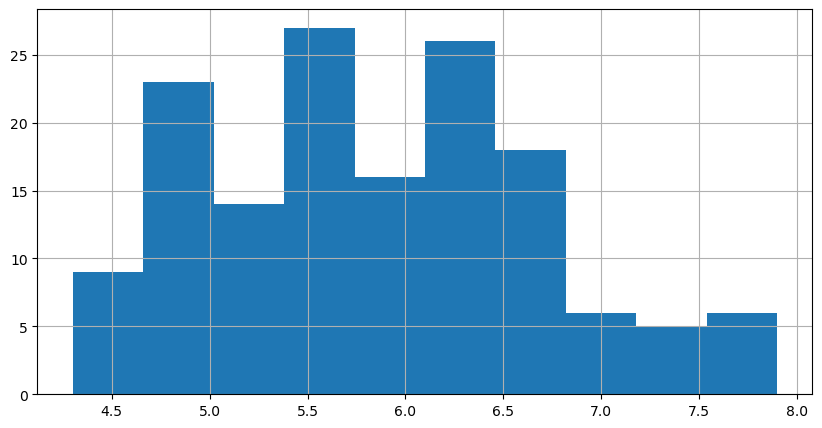

In [24]:
#Histogram
df2["SepalLengthCm"].hist(figsize = (10,5))

<Axes: >

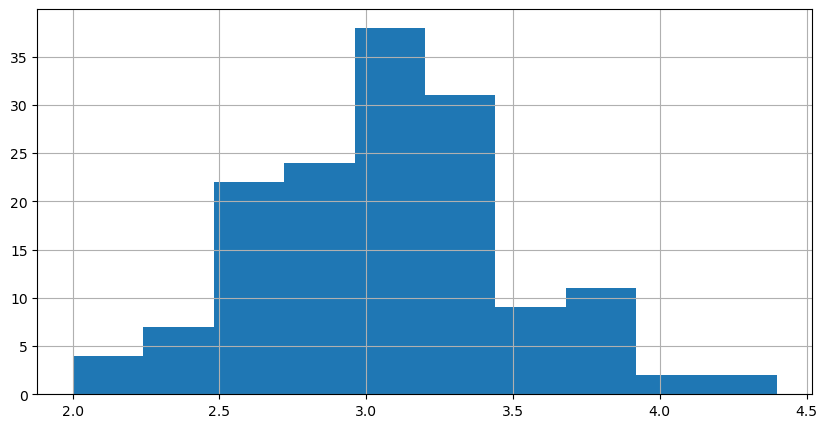

In [20]:
#Histogram
df2["SepalWidthCm"].hist(figsize = (10,5))

<Axes: >

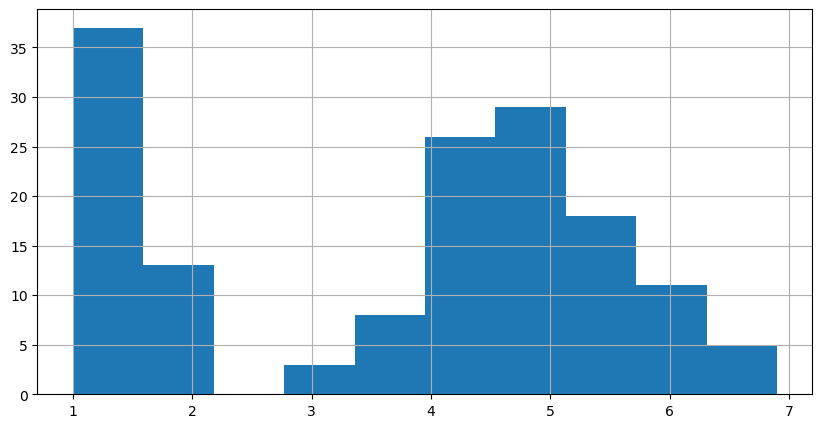

In [21]:
#Histogram
df2["PetalLengthCm"].hist(figsize = (10,5))

<Axes: >

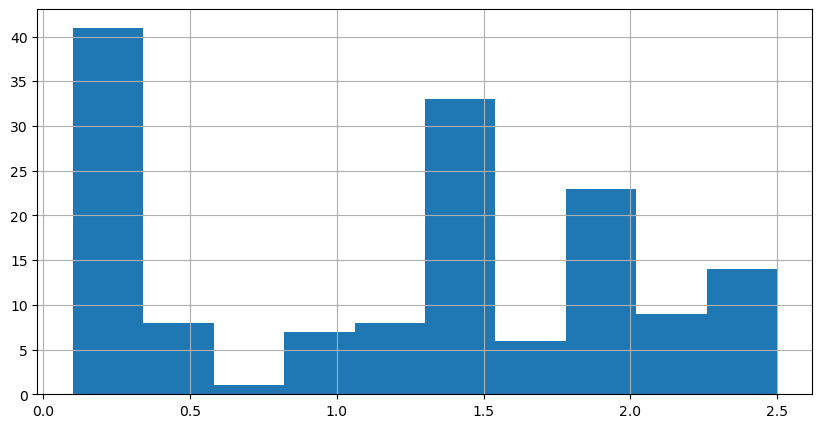

In [22]:
#Histogram
df2["PetalWidthCm"].hist(figsize = (10,5))

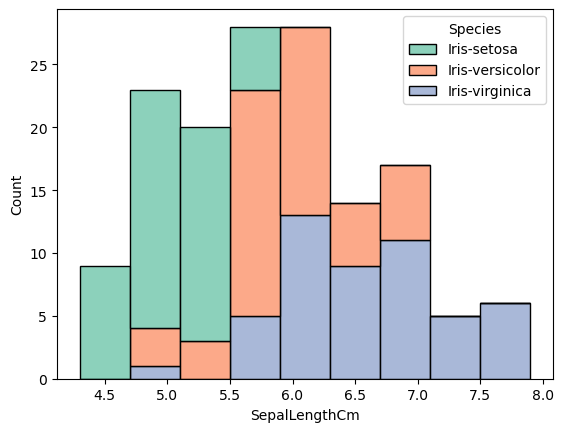

In [25]:
#Better Histograms
sns.histplot(data=df2, x="SepalLengthCm", hue="Species", multiple="stack", palette="Set2")
plt.show()

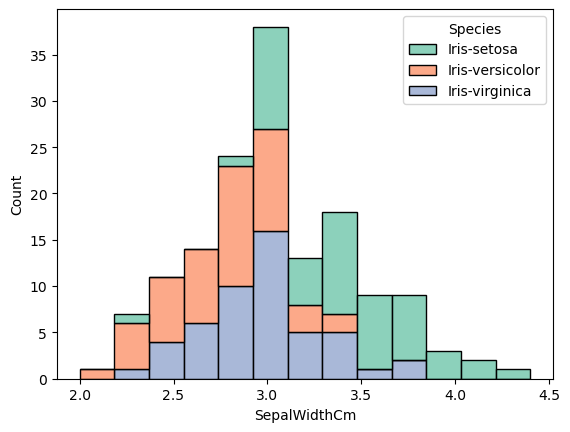

In [26]:
sns.histplot(data=df2, x="SepalWidthCm", hue="Species", multiple="stack", palette="Set2")
plt.show()

In [27]:
#Scatterplot (More relevant)

In [29]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

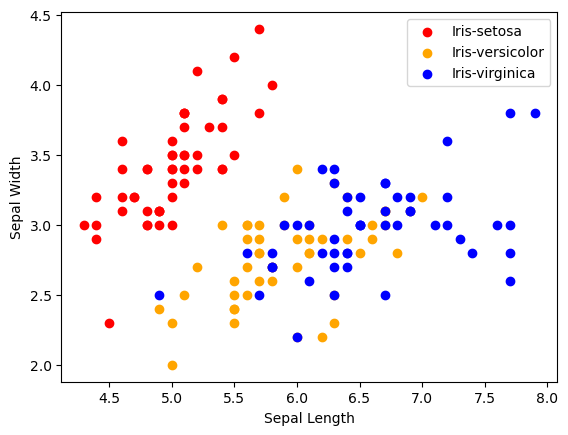

In [31]:
#sepal length vs sepal width

for i in range(3):
    x = df2[df2["Species"]== species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

#Iris setosa is separable

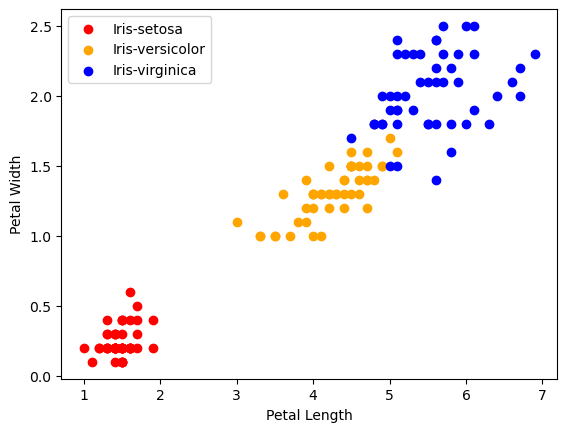

In [32]:
#Petal length vs letal width

for i in range(3):
    y = df2[df2["Species"]== species[i]]
    plt.scatter(y['PetalLengthCm'], y['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


#For petals alos, setosa is separable, and versi and virginica are also somewhat different

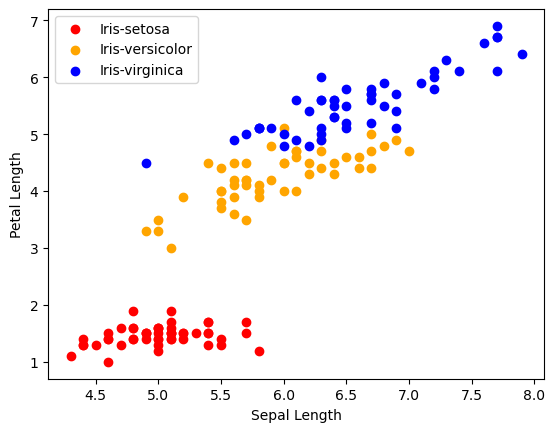

In [33]:
#Sepallength vs PetalLength

for i in range(3):
    y = df2[df2["Species"]== species[i]]
    plt.scatter(y['SepalLengthCm'], y['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

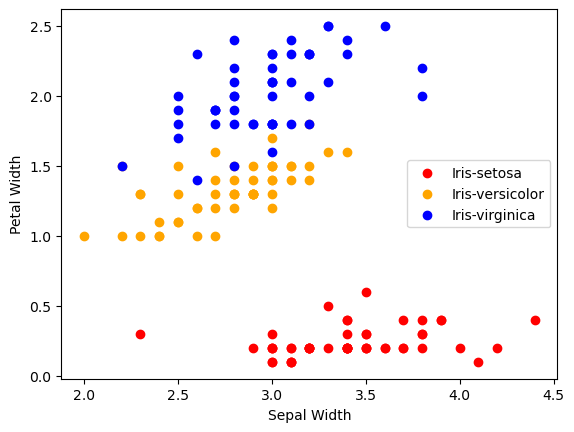

In [34]:
#Sepal width vs Petal width


for i in range(3):
    y = df2[df2["Species"]== species[i]]
    plt.scatter(y['SepalWidthCm'], y['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation matrix and Heatmap


## Error

In [37]:
df2.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [38]:
df2.select_dtypes(include='number').corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [40]:
corr = df2.corr()
fig, ax = plt.subplots(figsize = (10,10))

#heatmap using sns
sns.heatmap(corr, annot = True, ax = ax)

ValueError: could not convert string to float: 'Iris-setosa'

<Axes: >

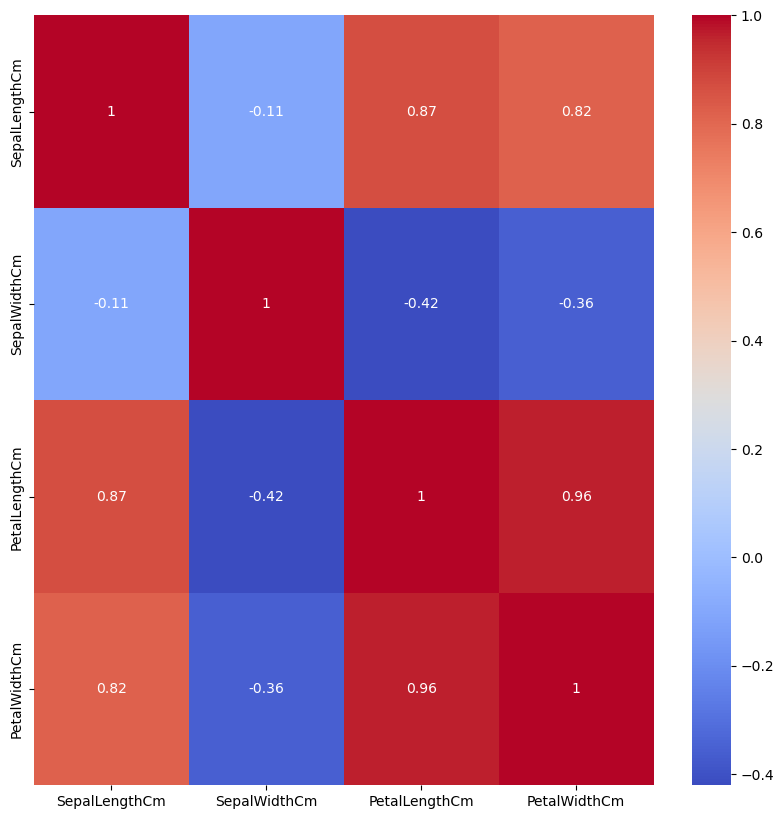

In [42]:
corr = df2.select_dtypes(include='number').corr()
fig, ax = plt.subplots(figsize = (10,10))

#heatmap using sns
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

✅ corr() is helpful when:
1. Checking feature relationships (numeric only):
Find strongly correlated features → may cause multicollinearity.

Example: Height vs Weight, Glucose vs Insulin.

2. Feature selection:
Drop features that are highly correlated with others.

Focus on features with high correlation with target (in regression).

⚠️ Not useful for:
Categorical data (unless encoded).

Non-linear relationships.

# Label Encoder

To convert named classes to numeric labels

In [43]:
from sklearn.preprocessing  import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
df2['Species'] = le.fit_transform(df2['Species'])

In [46]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df2["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [48]:
dict(zip(le.classes_, le.transform(le.classes_)))
#This is to decode the labels and its classes. Label encoder stores like a Dict


{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Model Training

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df2.drop(columns = ['Species'], axis = 1)
y = df2['Species'] 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [92]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [93]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [94]:
X_train.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [95]:
y_train.head()

22    0
15    0
65    1
11    0
42    0
Name: Species, dtype: int32

# LOGISTIC REGRESSION


In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [97]:
model.fit(X_train, y_train)


LogisticRegression()

# Model Assessment for LR

In [98]:
print("Accuracy: ", model.score(X_test, y_test)*100)

Accuracy:  100.0


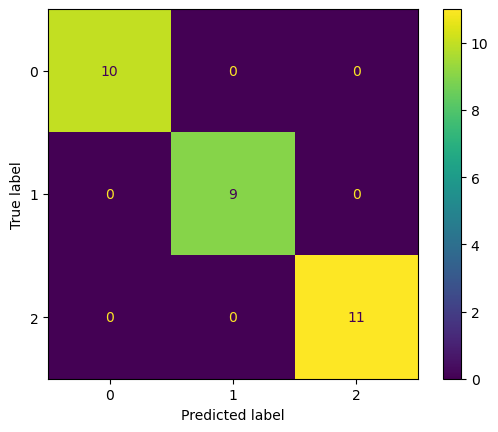

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# KNN Model


In [101]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
print("Accuracy: ", model2.score(X_test, y_test)*100,"%")

Accuracy:  100.0 %


# Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()

In [104]:
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
print("Accuracy: ", model3.score(X_test, y_test)*100,"%")

Accuracy:  100.0 %


 The Iris dataset is small, clean, and often perfectly separable, especially for Logistic Regression or tree-based models.

Setosa is easily separable.

Versicolor vs Virginica are slightly overlapping, but still often separable.

That’s why accuracy = 1.0 is normal in many runs. 